Optimizing urban road traffic using AI - assignment

Termin: 22 czerwca 2025 23:59
Instrukcje
Download the dataset from https://drive.google.com/file/d/1m5xgNXp3vv5zzH4JHfE9983cLiSR3IPp/view

In the file, you have 105336 rows. In each row, the first 21 elements are offsets at 21 intersections in Warsaw (a part of the Ochota district), while the last element is the total waiting time at red lights for all cars during a simulation of 10 minutes of realistic traffic (it was calculated using the Traffic Simulation Framework tool). The offsets are times (in seconds) from the start of the simulation to the first transition (of a selected signal state at the given intersection) from the red signal state to the green signal state. The values of the offsets are integers from the set {0,1,2,...,119}. The total wait times at red signals are also integers.

Your task is to implement a pipeline for:

1) Reading the data.

2) Splitting the dataset into a training set (first 85336 rows) and a test set (last 20000 rows).

3) Preprocessing the data (e.g., you can normalize the inputs and outputs).

4) Training at least 1 machine learning model (e.g., a feed-forward neural network, XGBoost, or LightGBM) to predict the total wait time at red signals based on the 21 offsets.

5) Calculating the MAPE (Mean Absolute Percentage Error) of the trained model(s) on the test set and presenting the results.

6) Optimizing the hyperparameters of your model, if needed.

7) Presenting the results, e.g., you can visualize how the MAPE or loss function changes in iterations of training.



It should be possible to get a MAPE below 2%, but it may take some time and may require optimizing the parameters. 

The code should be prepared as a Jupyter notebook. If you need a GPU, you can use Google Colab.



Questions: send an email to pawel.gora@qaif.org

Submission: send the Jupyter notebook file with the code to pawel.gora@qaif.org by 22.06.2025.

In [2]:
#install libraries
#pip install pandas scikit-learn xgboost lightgbm


1) Reading the data.

In [3]:
# import pandas as pd

# df = pd.read_csv("ochota100k.csv")

In [1]:
import pandas as pd

file_id = "1m5xgNXp3vv5zzH4JHfE9983cLiSR3IPp"
url = f"https://drive.google.com/uc?export=download&id={file_id}"
df = pd.read_csv(url)
print(df.head())

    81  14   58  108  83  60   82  61   64   94  ...   28   87   73   69   25  \
0   81  92   16   44  95  64  110  98   95  105  ...   42    5   40  105  118   
1   75  20   66  104  20  65   80  97    2   81  ...  119  115  118   64   68   
2   30  42   65  108  67  81   85  32   83   48  ...  107   79   44   90    6   
3  117  20   52   40  25  36   87  78   99   70  ...   92   21   34  102   37   
4   47  63  110   39  39  56  116  81  111   46  ...   63   98    3  101   54   

    7   77   95    5  49082  
0  48   40   62   45  51223  
1  46   45   43   18  51461  
2  25   46  102   62  45119  
3  46   11    9   66  50660  
4  14  109   79  111  49601  

[5 rows x 22 columns]


In [2]:
columns_names = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", 'time']
df.columns = columns_names
df.head()

,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,time
0,81,92,16,44,95,64,110,98,95,105,...,42,5,40,105,118,48,40,62,45,51223
1,75,20,66,104,20,65,80,97,2,81,...,119,115,118,64,68,46,45,43,18,51461
2,30,42,65,108,67,81,85,32,83,48,...,107,79,44,90,6,25,46,102,62,45119
3,117,20,52,40,25,36,87,78,99,70,...,92,21,34,102,37,46,11,9,66,50660
4,47,63,110,39,39,56,116,81,111,46,...,63,98,3,101,54,14,109,79,111,49601


2) Splitting the dataset into a training set (first 85336 rows) and a test set (last 20000 rows).

In [3]:
train_df = df.iloc[:85336]
test_df = df.iloc[-20000:]

3. Preprocessing the data (e.g., you can normalize the inputs and outputs).

In [4]:
X_train=train_df.drop(['time'], axis=1)
y_train=train_df['time']
X_test=test_df.drop(['time'], axis=1)
y_test=test_df['time']

4) Training at least 1 machine learning model (e.g., a feed-forward neural network, XGBoost, or LightGBM) to predict the total wait time at red signals based on the 21 offsets.

In [5]:
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
#!pip install lightgbm

  Using cached lightgbm-4.6.0-py3-none-win_amd64.whl.metadata (17 kB)
Using cached lightgbm-4.6.0-py3-none-win_amd64.whl (1.5 MB)



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import lightgbm as lgb

evals_result = {}

# Dane
train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_test, label=y_test)

# Parametry modelu
params = {
    'objective': 'regression',
    'metric': 'mape',
    'learning_rate': 0.05,
    'num_leaves': 31,
    'verbose': -1
}

# Trening z callbackami
model1 = lgb.train(
    params=params,
    train_set=train_data,
    num_boost_round=200,
    valid_sets=[train_data, valid_data],
    valid_names=['train', 'valid'],
    callbacks=[
        lgb.early_stopping(stopping_rounds=20),
        lgb.record_evaluation(evals_result),
        lgb.log_evaluation(period=10)  # Wyświetla logi co 10 iteracji
    ]
)


Training until validation scores don't improve for 20 rounds
[10]	train's mape: 0.052061	valid's mape: 0.0519486
[20]	train's mape: 0.0507577	valid's mape: 0.050725
[30]	train's mape: 0.049303	valid's mape: 0.0493051
[40]	train's mape: 0.0478337	valid's mape: 0.0478558
[50]	train's mape: 0.0465611	valid's mape: 0.0466292
[60]	train's mape: 0.0454788	valid's mape: 0.0455722
[70]	train's mape: 0.0443661	valid's mape: 0.0444826
[80]	train's mape: 0.0434313	valid's mape: 0.0435861
[90]	train's mape: 0.0424538	valid's mape: 0.0426655
[100]	train's mape: 0.0415045	valid's mape: 0.0417842
[110]	train's mape: 0.0402464	valid's mape: 0.0405967
[120]	train's mape: 0.0392372	valid's mape: 0.0396515
[130]	train's mape: 0.0382127	valid's mape: 0.0386951
[140]	train's mape: 0.0372689	valid's mape: 0.0378017
[150]	train's mape: 0.036454	valid's mape: 0.0370376
[160]	train's mape: 0.0356538	valid's mape: 0.0362962
[170]	train's mape: 0.0347594	valid's mape: 0.0354427
[180]	train's mape: 0.0341899	vali

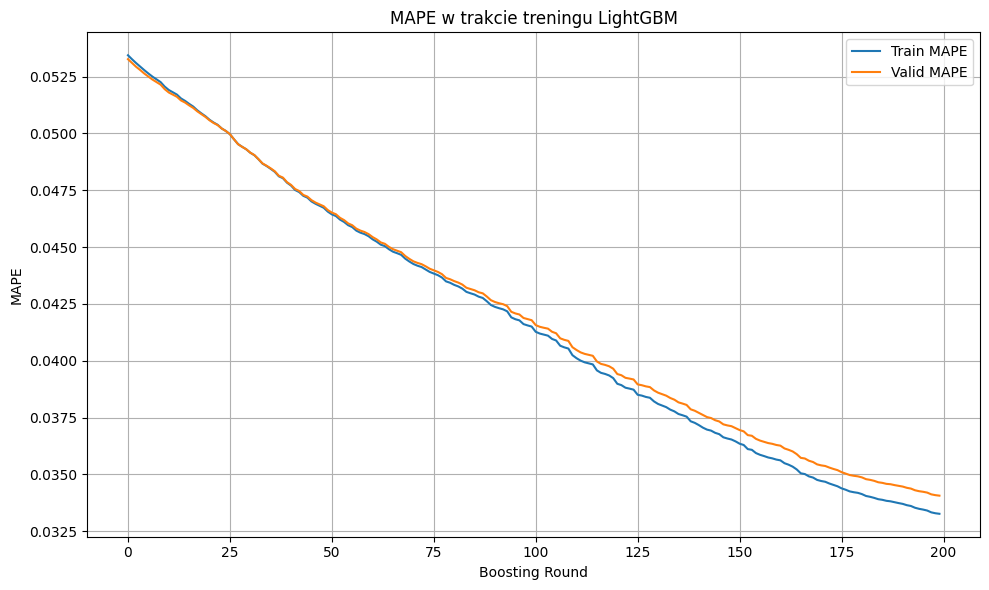

In [17]:
import matplotlib.pyplot as plt

# Pobierz metryki MAPE dla obu zbiorów
train_mape = evals_result['train']['mape']
valid_mape = evals_result['valid']['mape']

# Tworzenie wykresu
plt.figure(figsize=(10, 6))
plt.plot(train_mape, label='Train MAPE')
plt.plot(valid_mape, label='Valid MAPE')
plt.xlabel('Boosting Round')
plt.ylabel('MAPE')
plt.title('MAPE w trakcie treningu LightGBM')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [11]:
y_pred = model.predict(X_test)

In [12]:
len(y_test) == len(y_pred)

True

In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rmse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² score: {r2:.2f}")

RMSE: 4297988.20
MAE: 1661.66
R² score: 0.59


5) Calculating the MAPE (Mean Absolute Percentage Error) of the trained model(s) on the test set and presenting the results.

In [14]:
from sklearn.metrics import mean_absolute_percentage_error

mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"MAPE: {mape * 100:.2f}%")

MAPE: 3.41%


In [15]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, mean_absolute_percentage_error

y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))
print("MAPE:", mean_absolute_percentage_error(y_test, y_pred) * 100, "%")

MAE: 1661.6567249847021
RMSE: 4297988.196331787
R²: 0.5893492989832811
MAPE: 3.406645896626164 %


6) Optimizing the hyperparameters of your model, if needed.

7) Presenting the results, e.g., you can visualize how the MAPE or loss function changes in iterations of training.

KeyError: 'test'

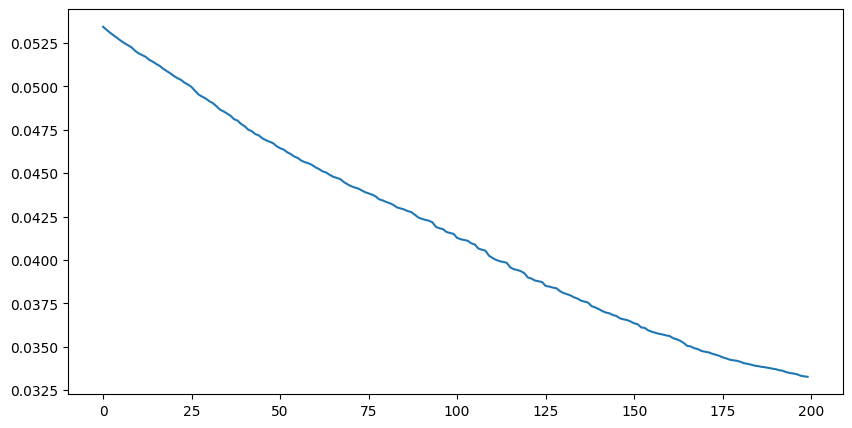

In [16]:
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error

plt.figure(figsize=(10, 5))
plt.plot(evals_result['train']['mape'], label='Train MAPE')
plt.plot(evals_result['test']['mape'], label='Test MAPE')
plt.xlabel('Iteration')
plt.ylabel('MAPE')
plt.title('MAPE over Boosting Rounds')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()